<a href="https://colab.research.google.com/github/ronaldolg26/APLICATIVO_PLAYSTORE/blob/main/Playstore_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Play Store


---



Com o avanço das tecnologias, muitos aplicativos de smartphone, tablets e computadores surgiram nos mais diversos ramos. Muitos desses morrem prematuramente ou não conseguem obter o resultado almejado. É possível listar uma série de problemas de negócio que tais aplicativos têm passado, como por exemplo, problemas de: 

* **Monetização**: muitos aplicativos lutam para encontrar um modelo de negócios rentável e sustentável.

* **Concorrência**: com milhões de aplicativos disponíveis nas lojas de aplicativos, a concorrência é acirrada, o que pode tornar difícil para os aplicativos se destacarem e obterem downloads.

* **Retenção de usuários**: muitos usuários baixam aplicativos, mas não os usam com frequência ou os desinstalam rapidamente. Isso pode ser um problema para aplicativos que dependem de usuários ativos para gerar receita.

* **Segurança de dados**: com os aplicativos coletando cada vez mais dados pessoais dos usuários, a segurança dos dados se tornou uma preocupação crescente para os usuários e reguladores.

* **Reputação**: a reputação de um aplicativo pode ser facilmente arruinada por problemas técnicos, bugs, críticas negativas e outros problemas. 


Nesse primeiro projeto, de uma série de 3 notebooks, farei o pré-processamento dos dados, limpando-os e deixando prontos para uma análise.


## Importado as Bibliotecas

In [1]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd  
pd.set_option('display.max_columns', None) 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler     
import missingno as msno

## 1. Importando a base de dados

In [3]:
base1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/App_Play_Store/googleplaystore.csv') 
base2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/App_Play_Store/googleplaystore_user_reviews.csv') 

Primeiras impressões do Data Frame

In [4]:
base1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Pré-Processamento



Para ajudar na compreensão, aqui está um dicionário das variáveis:  

`App`	- Nome  do App

`Category`	- Categoria

`Rating`	- Pontuação 

`Reviews`	- Avaliações

`Size`	- Tamanho

`Installs` - N° de Instalações

`Type`	- Tipo 

`Price`	- Preço

`Content Rating`	- Classificação do Conteúdo

`Genres`	- Gênero

`Last Updated` - Última Atualização

`Current Ver`	- Versão Atual

`Android Ver` - Versão Android

## 2.1 Exclusão de Dados

Algumas colunas e alguns dados não são relevantes para nosso estudo em um primeiro momento. Por isso, optamos em excluir as colunas `Current Ver`, `Android Ver` e `Genres`. Esta última em particular se deve ao fato de já existir a coluna `Category`, que traz uma boa noção em que nicho o aplicativo atua.

In [5]:
base1 = base1.drop(['Current Ver','Android Ver', 'Genres'], axis=1)

## 2.2 Sujeira nos Dados

Se verificarmos as propriedade dos dados encontraremos alguns problemas. Vejamos:

In [ ]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB


Cada coluna precisara de um tratamento específico. Veja, por exemplo, que as colunas `Reviews`, `Size`, `Installs` e ``Prices`` deveriam ser tipos numéricos como Float ou Int. Mas antes de uma conversão, é necessário verificar se alguma dessas colunas tem caracteres não numéricos. Além disso, diversas colunas apresentam caráteres que impossibilitam uma conversão, exigindo uma limpeza.

### 2.2.1 Category


-----

In [6]:
base1["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Veja que, dentre as categorias existentes, uma é denominada ``1.9``. Precisamos inspecionar e saber quantas dessas instâncias se enquadra nessa categoria que não traz um sentido explicito como as demais.

In [7]:
base1[base1['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19


### 2.2.2 Reviews


----

Observe ainda que na coluna `Reviews` a instância anterior apresenta a letra ``M``. Isso acarreta um problema na conversão.


In [8]:
base1['Reviews'] = pd.to_numeric(base1['Reviews'], errors='coerce')  
base1['Reviews'].isnull().sum() 

1

Como é apenas um único aplicativo que está sujando nossos dados, optamos por excluí-lo. 

In [9]:
base1 = base1.drop(base1[base1['Category'] == '1.9'].index)

### 2.2.3 Installs


------

Na coluna `Installs`, retiraremos os caracteres "+" (soma) e a "," (virgula)




In [10]:
base1['Installs'] = base1['Installs'].str.replace('+','') 
base1['Installs'] = base1['Installs'].str.replace(',','')

<ipython-input-10-93a130047adf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base1['Installs'] = base1['Installs'].str.replace('+','')


### 2.2.4 Size


-----

Na coluna `Size`, o processo é um pouco maior, precisaremos converter as unidades de medidas "k" e "M" para uma única unidade, neste caso o Kilobyte. Além disso, há também os valores `Varies with device` quando o tamanho do aplicativo é variável. Veja:



In [11]:
base1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Criaremos uma função para conversão das unidades de medida.

In [12]:
def converter_tamanho(valor):
    if valor.endswith('k'):
        return float(valor[:-1])  # Remove o 'k' e converte para inteiro
    elif valor.endswith('M'):
        return float(valor[:-1]) * 1000  # Remove o 'M', converte para inteiro e multiplica por 1000
    else:
        return valor  # Retorna o valor original 

base1 ["Size"] = base1["Size"].apply(converter_tamanho) #Aplicação da Função criada.

Convertendo os valores `Varies with device` para a média, já que não sabemos o tamanho real desses aplicativos.

In [13]:
base1['Size'] = pd.to_numeric(base1['Size'], errors='coerce') 
media = base1['Size'].mean()

In [15]:
def verificar_nan(valor):
    if pd.isna(valor):
        return media
    else:
        return valor

base1["Size"] = base1["Size"].apply(verificar_nan)

### Price


------

Na coluna `Price` precisamos retirar o cifrão ``$`` dos nossos dados. Veja:



In [16]:
base1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
base1["Price"] = base1["Price"].str.replace('$','')

<ipython-input-17-3c3357fe8cda>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base1["Price"] = base1["Price"].str.replace('$','')


## 2.3 Conversão de Dados

Agora que já tiramos algumas sujeiras dos dados, iremos converter os seus tipos. Veja como estão:

In [18]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
dtypes: float64(3), object(7)
memory usage: 931.6+ KB


In [19]:
base1['Installs'] = base1['Installs'].astype(int) 
base1['Price'] = base1['Price'].astype(float) 
base1['Last Updated'] = pd.to_datetime(base1['Last Updated'])

## 2.4 Dados Duplicados

Analisemos agora a existência de dados duplicados.

In [20]:
print(f"Existe {base1.duplicated().sum()} valores duplicados")

Existe 483 valores duplicados


Em virtude do tamanho da nossa base de dados, optamos por exclui-los, já que não gerará um impacto significativo nos nossos dados.

In [21]:
base1 = base1.drop_duplicates()

## 2.4 Dados Nulos

Verificaremos agora os dados nulo

In [22]:
base1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Last Updated         0
dtype: int64

Como observado, há muitos dados nulos na coluna `Rating`, antes de qualquer ação vamos aprofundar um pouco neles.  
A biblioteca Missingno nos fornece uma visualização de como os dados ausentes estão distribuidos.

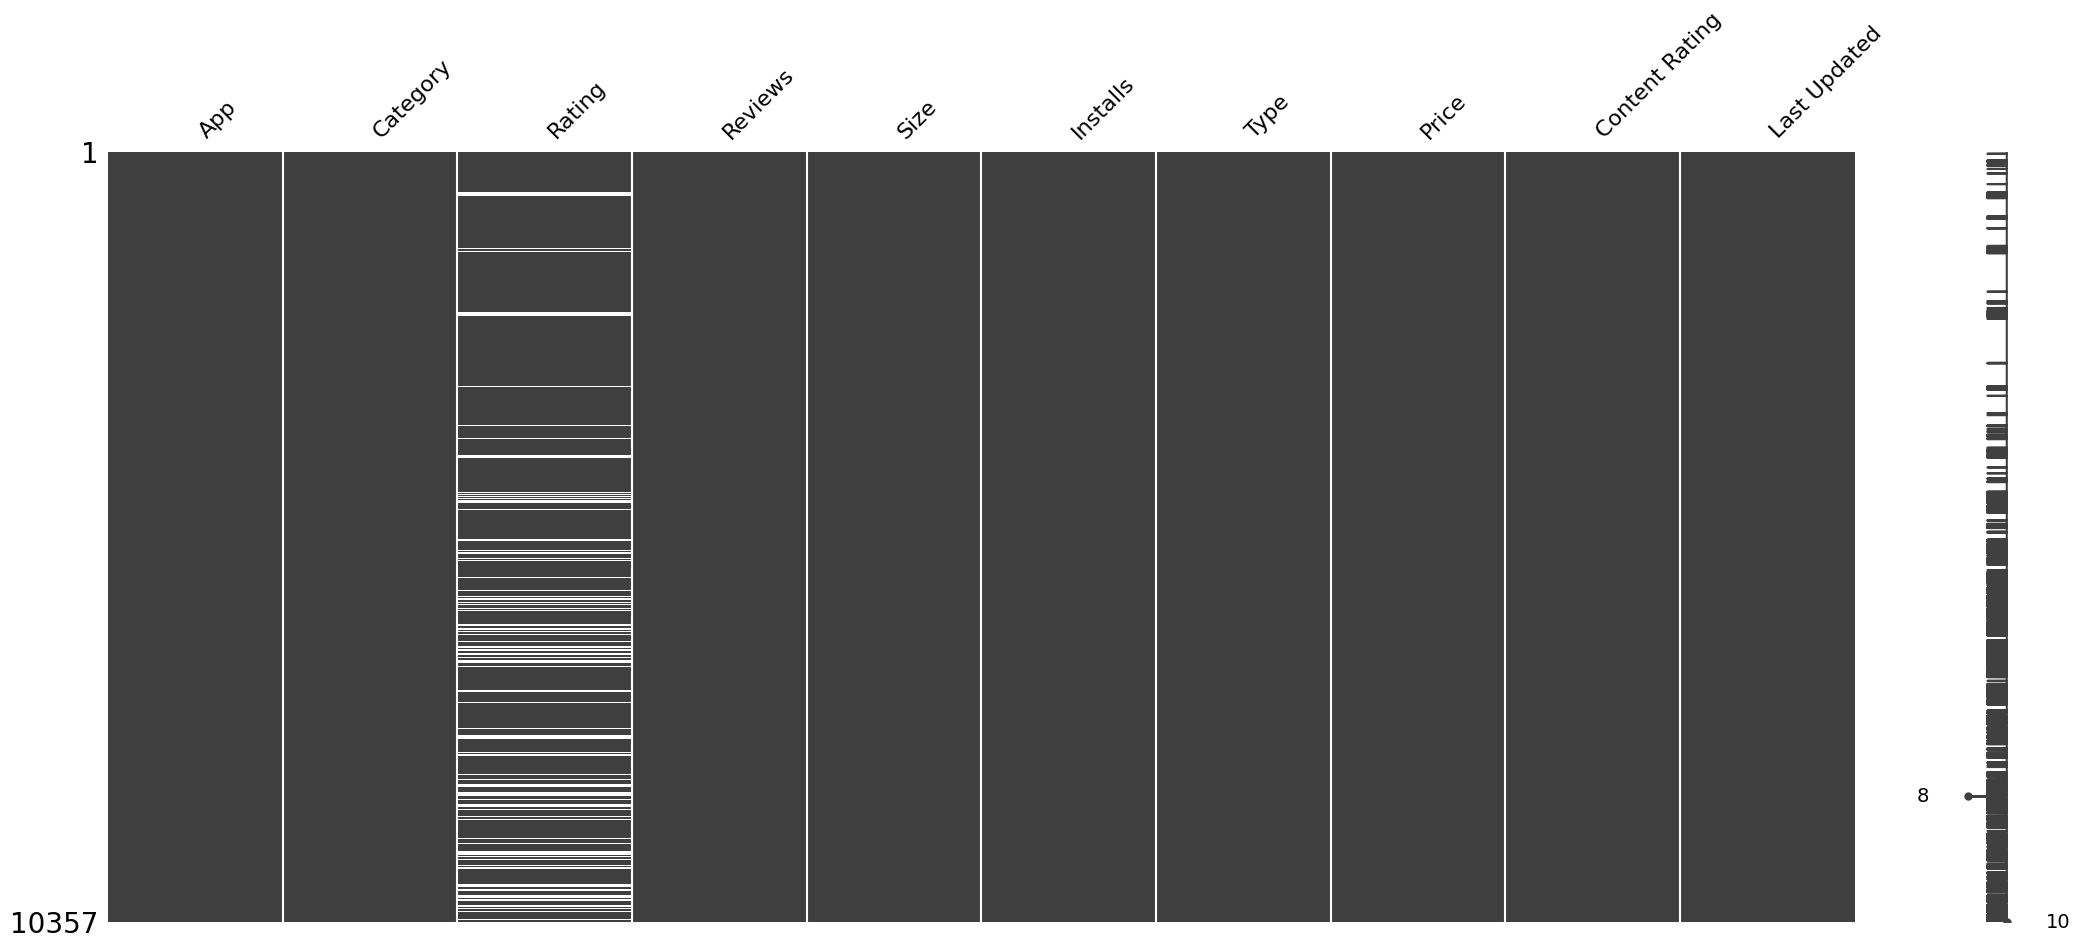

In [ ]:
msno.matrix(base1)
plt.show()

Aparentemente não há padrão entre os dados ausentes. 

# 3. Conclusão

Chegamos a conclusão da nossa primeira etapa. Limpamos os dados suficientemete para começarmos a nossa análise. No próximo notebook analisaremos os dados em busca de insight e de uma compreensão melhor do problema. 

In [ ]:
base1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.000000,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.000000,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.000000,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.000000,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.000000,100000,Free,0.0,Everyone,2018-06-20
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.000000,5000,Free,0.0,Everyone,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.000000,100,Free,0.0,Everyone,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500.000000,1000,Free,0.0,Everyone,2017-01-20
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,21516.529524,1000,Free,0.0,Mature 17+,2015-01-19
